# Demonstração de classificação com SVM usando Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
target = data.target

In [3]:
#Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(gamma='auto')

In [4]:
#Testando o modelo 'svc' na nossa base 'iris'
cv_result = cross_val_score(svc, iris, target, cv=10, scoring='accuracy')
#Retorna a acurácia em porcentagem do nosso modelo
print('Acurácia com cross validation:', cv_result.mean()*100)

Acurácia com cross validation: 98.00000000000001


In [5]:
svc.fit(iris, target)
#Prediz a que classe pertencerá a flor com sépala de comprimento 6.9 cm e de largura 2.8 cm, e com pétala de comprimento 6.1 cm e de largura 2.3 cm
svc.predict([[6.9,2.8,6.1,2.3]])

/home/breia/lab/estudos/faculdade/bigdata/pyspark/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

Text(0.5, 1.0, 'Iris')

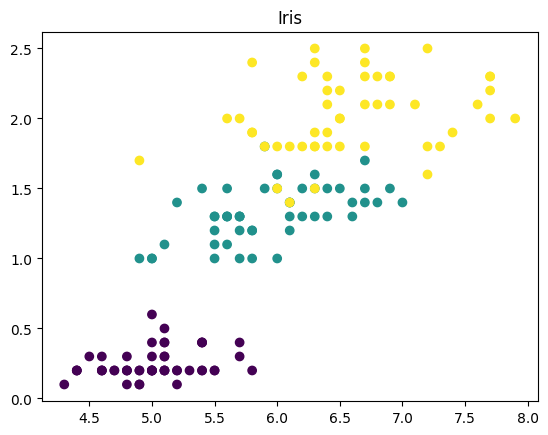

In [6]:
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)
plt.title('Iris')

/home/breia/lab/estudos/faculdade/bigdata/pyspark/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


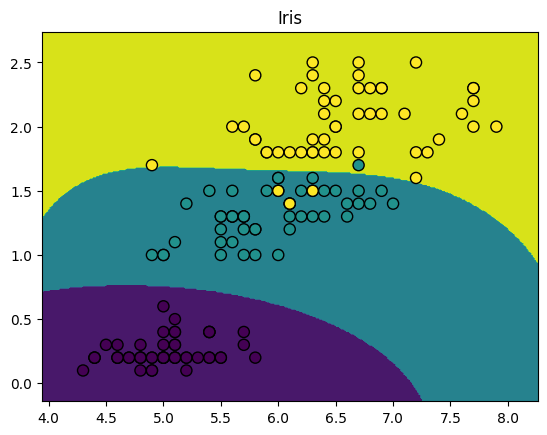

In [7]:
#Provavelmente, criando 2 features novas no íris, o svm com 2 features terá mais sucesso, mas por enquanto usei só
#sepal length e petal width (os mais relevantes das 4 features já existentes)
x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                        np.linspace(x1_min-.1*h, x1_max+.1*h, 300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()